# Analysis and Prediction of Commodity Prices in Gunung Kidul Using Regression Algorithms

# Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


import warnings
warnings.filterwarnings('ignore')

# Load Data

In [2]:
df = []
df.append(pd.read_excel('data/prognosa-gk-januari-m3.xls'))
df.append(pd.read_excel('data/prognosa-gk-februari-m3.xls'))
df.append(pd.read_excel('data/prognosa-gk-maret-m3.xls'))
df.append(pd.read_excel('data/prognosa-gk-april-m3.xls'))
df.append(pd.read_excel('data/prognosa-gk-mei-m3.xls'))
df.append(pd.read_excel('data/prognosa-gk-juni-m3.xlsx'))
df.append(pd.read_excel('data/prognosa-gk-juli-m3.xls'))
df.append(pd.read_excel('data/prognosa-gk-agustus-m3.xls'))
df.append(pd.read_excel('data/prognosa-gk-september-m3.xls'))
df.append(pd.read_excel('data/prognosa-gk-oktober-m3.xls'))
df.append(pd.read_excel('data/prognosa-gk-november-m3.xls'))
df.append(pd.read_excel('data/prognosa-gk-desember-m3.xls'))

# Preprocessing

In [3]:
df[0].head()

,NO,KOMODITAS,PRODUKSI (TON),STOK (TON),IMPOR (TON),EKSPOR (TON),KETERSEDIAAN (TON),KEBUTUHAN (TON),Unnamed: 8,Unnamed: 9,NERACA MINGGUAN (TON),HARGA (RP)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RUMAH TANGGA,NON RUMAH TANGGA,TOTAL,NaN,NaN
1,1.0,Beras,3965.01,417.0000,363.469231,226.173077,4519.306154,1364.7024,409.41072,1774.11312,2745.193034,13000.0
2,2.0,Jagung,4.13,18.7000,NaN,NaN,22.830000,14.580154,4.374046,18.9542,3.875800,7000.0
3,3.0,Bawang merah,7.90,46.2500,53.373077,20.807692,86.715385,40.095423,12.028627,52.12405,34.591335,32000.0
4,4.0,Bawang putih,0.02,74.3875,73.757692,NaN,148.165192,25.077865,7.523359,32.601224,115.563968,20000.0


In [4]:
df[1].head()

,NO,KOMODITAS,PRODUKSI (TON),STOK (TON),IMPOR (TON),EKSPOR (TON),KETERSEDIAAN (TON),KEBUTUHAN (TON) RUMAH TANGGA,KEBUTUHAN (TON) NON RUMAH TANGGA,TOTAL,NERACA MINGGUAN (TON),HARGA (RP)
0,1,Beras,2373.30,355.00,0.624058,235.250000,2493.674058,1052.70,210.540,1263.240,1230.43,9200
1,2,Jagung,1881.00,2.65,NaN,NaN,1883.650000,7.40,1.480,8.880,1874.77,4600
2,3,Cabe Merah Keriting,6.07,38.50,0.473140,NaN,45.043140,2.61,0.522,3.132,41.91,55000
3,4,Cabe Rawit Merah,11.76,9.25,0.259520,NaN,21.269520,2.69,0.538,3.228,18.04,60000
4,5,Bawang Merah,1.02,38.50,29.342308,10.153846,58.708462,40.73,8.146,48.876,9.83,22000


In [5]:
exceptional= [1,2,3,4,5]

In [6]:
for i in range(0,12):
    if i not in exceptional:
        print(i)
        df[i] =  df[i].rename(columns={'KEBUTUHAN (TON)':'RUMAH TANGGA (TON)', 'Unnamed: 8':'NON RUMAH TANGGA (TON)', 'Unnamed: 9':'TOTAL (TON)'})
        df[i] = df[i].drop(index=[0])
        df[i] = df[i].drop(columns=['NO', 'KETERSEDIAAN  (TON)', 'TOTAL (TON)', 'NERACA MINGGUAN (TON)'])

0
6
7
8
9
10
11


In [7]:
for i in exceptional:
    df[i] = df[i].drop(columns=['NO', 'KETERSEDIAAN  (TON)', 'TOTAL', 'NERACA MINGGUAN (TON)'])
    df[i] = df[i].rename(columns={
                            'KEBUTUHAN (TON) RUMAH TANGGA' : 'RUMAH TANGGA (TON)',
                            'KEBUTUHAN (TON) NON RUMAH TANGGA': 'NON RUMAH TANGGA (TON)'
                        })



In [8]:
df_concat = pd.DataFrame(columns=df[0].columns)

In [9]:
for i in df:
    df_concat = pd.concat([df_concat, i])    

In [10]:
df_concat = df_concat.reset_index(drop=True)

In [11]:
df_concat['KOMODITAS'] = df_concat['KOMODITAS'].str.lower()

In [12]:
df_concat['KOMODITAS'] = df_concat['KOMODITAS'].str.replace(" ", "")

In [13]:
df_concat['KOMODITAS'].value_counts()

KOMODITAS
beras                 12
jagung                12
bawangmerah           12
bawangputih           12
dagingsapi            12
dagingayamras         12
telurayamras          12
gulapasir             12
minyakgoreng          12
cabaimerahkeriting    11
cabairawitmerah       11
kedelai                1
cabemerahkeriting      1
caberawitmerah         1
Name: count, dtype: int64

In [14]:
df_concat['KOMODITAS'] = df_concat['KOMODITAS'].replace('cabemerahkeriting', 'cabaimerahkeriting')
df_concat['KOMODITAS'] = df_concat['KOMODITAS'].replace('caberawitmerah', 'cabairawitmerah')


In [15]:
df_concat = df_concat[df_concat['KOMODITAS'] != 'kedelai']

In [16]:
df_concat.duplicated().sum()

1

In [17]:
df_concat = df_concat.drop_duplicates()

# EDA

In [18]:
df_num = df_concat.drop(columns=['KOMODITAS'])

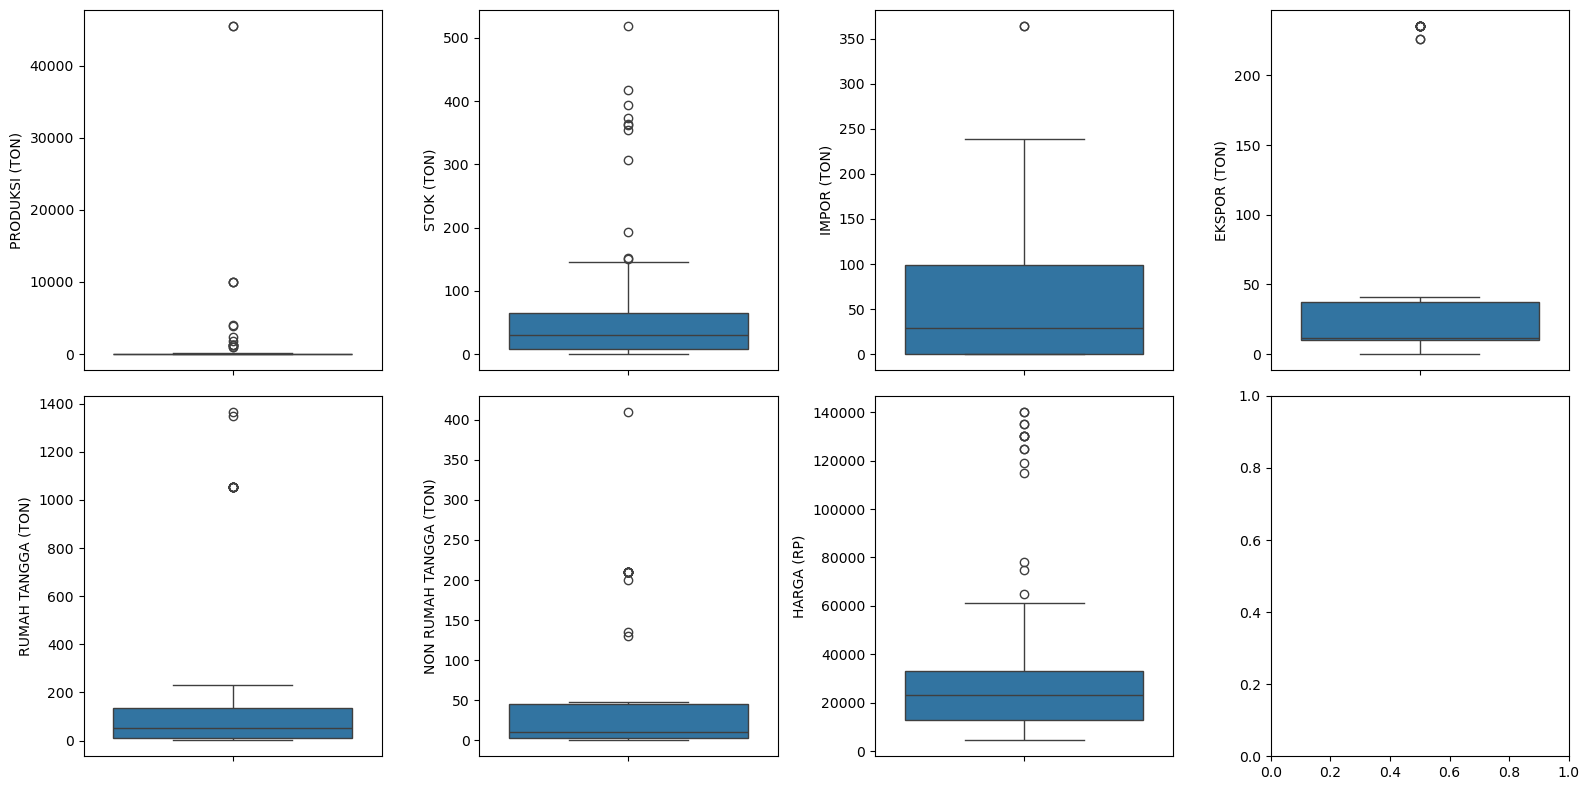

In [19]:
fig, axes = plt.subplots(2, 4, figsize=(16,8))
index = 0
for i in range (2):
    for j in range (4):
        if index < 7:
            sns.boxplot(data=df_concat, y=df_num.columns[index], ax=axes[i][j])
            index+=1
        else:
            break
plt.tight_layout()
plt.show()

Based on the boxplot above, all numerical columns have outliers. Because of these outliers, I'll use robustscaler for feature scaling, which equalizes the value ranges between variables and reduces the influence of outliers.

<Axes: xlabel='count', ylabel='KOMODITAS'>

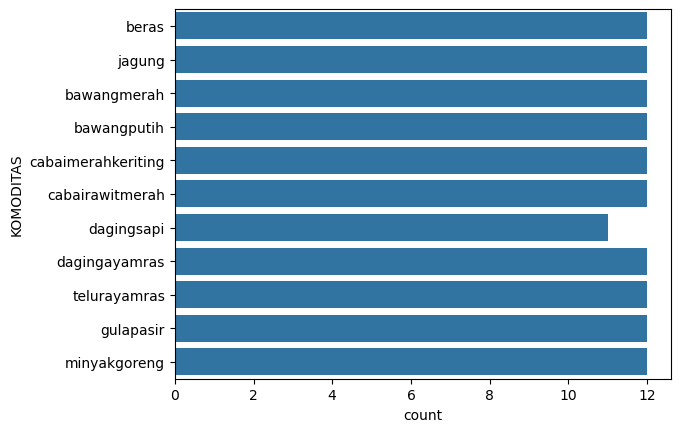

In [20]:
sns.countplot(data=df_concat, y='KOMODITAS')

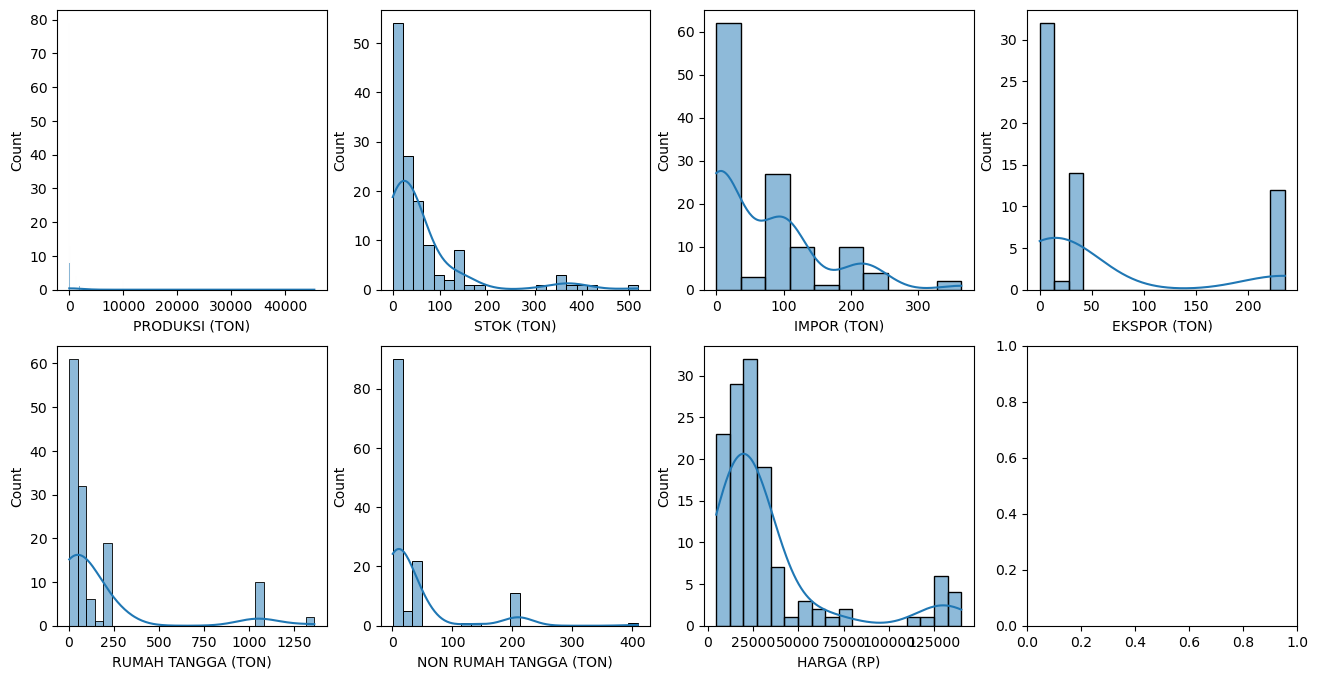

In [21]:
fig, axes = plt.subplots(2, 4, figsize=(16,8))
index = 0
for i in range (2):
    for j in range (4):
        if index < 7:
            sns.histplot(data=df_concat, x=df_num.columns[index], kde=True, ax=axes[i][j])
            index+=1
        else:
            break

Based on the histplot above, it can be seen that there is no normal distribution of the numerical column.

In [22]:
df_num.describe()

,PRODUKSI (TON),STOK (TON),IMPOR (TON),EKSPOR (TON),HARGA (RP)
count,125.000000,131.000000,119.000000,59.000000,131.000000
mean,1135.483263,60.794421,69.308271,59.858999,32963.358779
std,5898.775568,93.811357,82.284751,89.393914,33701.563434
min,0.000000,0.175000,0.159520,0.020019,4600.000000
25%,1.890000,8.750000,0.373140,10.153846,13000.000000
50%,9.790000,29.750000,29.142308,11.230769,23000.000000
75%,49.820000,64.485000,99.050000,37.384615,33000.000000
max,45423.020000,518.204000,363.469231,235.250000,140000.000000


<Axes: >

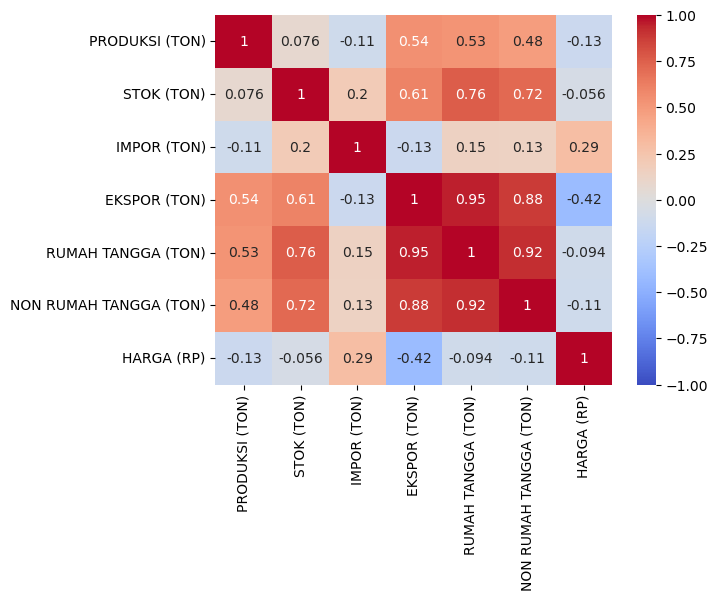

In [23]:
sns.heatmap(df_num.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm')

Based on the correlation between numerical variables, it appears that the price variable only correlates strongly with imports and exports, while there is a correlation between the independent variables.

In [24]:
from scipy.stats import ttest_ind, f_oneway

In [25]:
# Inisialisasi
cat_col = 'KOMODITAS'
num_cols = df_concat.select_dtypes(include='number').columns.tolist()

# Lihat jumlah kategori
n_unique = df_concat[cat_col].nunique()

# Simpan hasil uji
results = []

# Loop variabel numerik
for col in num_cols:
    data = [group[col].dropna() for name, group in df_concat.groupby(cat_col)]
    
    stat, p = f_oneway(*data)
    test = 'ANOVA'
    
    # Interpretasi hasil
    hubungan = 'Ada hubungan' if p <= 0.05 else 'Tidak ada hubungan'
    
    results.append({
        'Variabel': col,
        'Uji Statistik': test,
        'Statistik': round(stat, 3),
        'p-value': round(p, 4),
        'Kesimpulan': hubungan
    })
    
hasil_df = pd.DataFrame(results)

In [26]:
hasil_df

,Variabel,Uji Statistik,Statistik,p-value,Kesimpulan
0,PRODUKSI (TON),ANOVA,5.371,0.0,Ada hubungan
1,STOK (TON),ANOVA,19.617,0.0,Ada hubungan
2,IMPOR (TON),ANOVA,NaN,NaN,Tidak ada hubungan
3,EKSPOR (TON),ANOVA,NaN,NaN,Tidak ada hubungan
4,HARGA (RP),ANOVA,123.372,0.0,Ada hubungan


## EDA conclusion
- All numerical variables have outliers.
- All numerical variables have a non-normal distribution.
- The commodity variable has the same distribution of values, 12.
- Most independent variables are correlated with each other.
- The target variable only has a fairly strong correlation with imports, exports, and commodities.

# Feature Engineering

In [27]:
numeric_features = ['PRODUKSI (TON)', 'STOK (TON)', 'IMPOR (TON)', 'EKSPOR (TON)', 'RUMAH TANGGA (TON)', 'NON RUMAH TANGGA (TON)']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', RobustScaler())])

Based on the code above, I performed missing values ​​imputation by filling in the value 0 because after investigating, the missing values ​​in this dataset were intentionally created or had a value of 0.

In [28]:
categorical_features = ['KOMODITAS']
categorical_transformer = Pipeline(
    steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)

Based on the code above, I do one hot encoding for categorical columns whose values ​​in the column are equal (no order).

In [29]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [30]:
X = df_concat.drop(columns=['HARGA (RP)'])
y = df_concat['HARGA (RP)']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Decision Tree

In [32]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [33]:
pipe_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor(random_state=42))
])

In [34]:
param_grid_dt = {
    'model__criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'model__splitter': ['best', 'random'],
    'model__max_depth': [None, 5, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': [None, 'sqrt', 'log2']
}

In [35]:
search_dt = GridSearchCV(pipe_dt, param_grid_dt, n_jobs=-1, cv=cv, scoring='neg_mean_absolute_error')
search_dt.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=0,
                                                                                                        strategy='constant')),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['PRODUKSI '
                                                                          '(TON)',
                                                                          'STOK '
                                                                          '(TON)',
                                                                          'IMPOR '
                                                                          '(TON)',
                                                                          'EKSPOR '
                                                                          '(TON)',
                                                                          'RUMAH '
                                                                          'TANGGA '
                                                                          '(TON)',
                                                                          'NON '
                                                                          'RUMAH '
                                                                          'TA...
                                        DecisionTreeRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__criterion': ['squared_error', 'friedman_mse',
                                              'absolute_error', 'poisson'],
                         'model__max_depth': [None, 5, 10, 20],
                         'model__max_features': [None, 'sqrt', 'log2'],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__splitter': ['best', 'random']},
             scoring='neg_mean_absolute_error')

In [36]:
print(f"Best CV score= {search_dt.best_score_}")
print(search_dt.best_params_)

Best CV score= -4519.671201814059
{'model__criterion': 'squared_error', 'model__max_depth': None, 'model__max_features': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 10, 'model__splitter': 'random'}


In [37]:
model_dt = search_dt.best_estimator_
model_dt.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['PRODUKSI (TON)',
                                                   'STOK (TON)', 'IMPOR (TON)',
                                                   'EKSPOR (TON)',
                                                   'RUMAH TANGGA (TON)',
                                                   'NON RUMAH TANGGA (TON)']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['KOMODITAS'])])),
                ('model',
                 DecisionTreeRegressor(min_samples_split=10, random_state=42,
                                       splitter='random'))])

In [38]:
y_dt = model_dt.predict(X_test)

In [39]:
mae_dt = mean_absolute_error(y_test, y_dt)
mse_dt = mean_squared_error(y_test, y_dt)
r2_dt = r2_score(y_test, y_dt)

In [40]:
print(f"Mean Absolute Error DT : {mae_dt}")
print(f"Mean Squared Error DT : {mse_dt}") 
print(f"R Squared DT : {r2_dt}") 

Mean Absolute Error DT : 8461.302175191064
Mean Squared Error DT : 289935799.14038664
R Squared DT : 0.7391329942064088


## Random Forest

In [41]:
pipe_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

In [42]:
param_grid_rf = {
    'model__n_estimators': [100, 200],
    'model__criterion': ['squared_error', 'absolute_error'],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2],
    'model__max_features': ['auto', 'sqrt', 'log2']
}

In [43]:
search_rf = GridSearchCV(pipe_rf, param_grid_rf, n_jobs=-1, cv=cv, scoring='neg_mean_absolute_error')
search_rf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=0,
                                                                                                        strategy='constant')),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['PRODUKSI '
                                                                          '(TON)',
                                                                          'STOK '
                                                                          '(TON)',
                                                                          'IMPOR '
                                                                          '(TON)',
                                                                          'EKSPOR '
                                                                          '(TON)',
                                                                          'RUMAH '
                                                                          'TANGGA '
                                                                          '(TON)',
                                                                          'NON '
                                                                          'RUMAH '
                                                                          'TA...
                                                                         ['KOMODITAS'])])),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__criterion': ['squared_error',
                                              'absolute_error'],
                         'model__max_depth': [None, 10, 20],
                         'model__max_features': ['auto', 'sqrt', 'log2'],
                         'model__min_samples_leaf': [1, 2],
                         'model__min_samples_split': [2, 5],
                         'model__n_estimators': [100, 200]},
             scoring='neg_mean_absolute_error')

In [44]:
print(f"Best CV score= {search_rf.best_score_}")
print(search_rf.best_params_)

Best CV score= -6517.00738095238
{'model__criterion': 'absolute_error', 'model__max_depth': 10, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}


In [45]:
model_rf = search_rf.best_estimator_
model_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['PRODUKSI (TON)',
                                                   'STOK (TON)', 'IMPOR (TON)',
                                                   'EKSPOR (TON)',
                                                   'RUMAH TANGGA (TON)',
                                                   'NON RUMAH TANGGA (TON)']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['KOMODITAS'])])),
                ('model',
                 RandomForestRegressor(criterion='absolute_error', max_depth=10,
                                       max_features='sqrt', random_state=42))])

In [46]:
y_rf = model_rf.predict(X_test)

In [47]:
mae_rf = mean_absolute_error(y_test, y_rf)
mse_rf = mean_squared_error(y_test, y_rf)
r2_rf = r2_score(y_test, y_rf)

In [48]:
print(f"Mean Absolute Error RF : {mae_rf}")
print(f"Mean Squared Error RF : {mse_rf}") 
print(f"R Squared RF : {r2_rf}") 

Mean Absolute Error RF : 9220.851851851852
Mean Squared Error RF : 316633600.1111111
R Squared RF : 0.715111899118617


## Linear Regression

In [49]:
pipe_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [50]:
param_grid_lr = {
    'model__fit_intercept': [True, False]
}

In [51]:
search_lr = GridSearchCV(pipe_lr, param_grid_lr, n_jobs=-1, cv=cv, scoring='neg_mean_absolute_error')
search_lr.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=0,
                                                                                                        strategy='constant')),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['PRODUKSI '
                                                                          '(TON)',
                                                                          'STOK '
                                                                          '(TON)',
                                                                          'IMPOR '
                                                                          '(TON)',
                                                                          'EKSPOR '
                                                                          '(TON)',
                                                                          'RUMAH '
                                                                          'TANGGA '
                                                                          '(TON)',
                                                                          'NON '
                                                                          'RUMAH '
                                                                          'TANGGA '
                                                                          '(TON)']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['KOMODITAS'])])),
                                       ('model', LinearRegression())]),
             n_jobs=-1, param_grid={'model__fit_intercept': [True, False]},
             scoring='neg_mean_absolute_error')

In [52]:
print(f"Best CV score= {search_lr.best_score_}")
print(search_lr.best_params_)

Best CV score= -5475.118311676041
{'model__fit_intercept': False}


In [53]:
model_lr = search_lr.best_estimator_
model_lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['PRODUKSI (TON)',
                                                   'STOK (TON)', 'IMPOR (TON)',
                                                   'EKSPOR (TON)',
                                                   'RUMAH TANGGA (TON)',
                                                   'NON RUMAH TANGGA (TON)']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['KOMODITAS'])])),
                ('model', LinearRegression(fit_intercept=False))])

In [54]:
y_lr = model_lr.predict(X_test)

In [55]:
mae_lr = mean_absolute_error(y_test, y_lr)
mse_lr = mean_squared_error(y_test, y_lr)
r2_lr = r2_score(y_test, y_lr)

In [56]:
print(f"Mean Absolute Error LR : {mae_lr}")
print(f"Mean Squared Error LR : {mse_lr}") 
print(f"R Squared LR : {r2_lr}") 

Mean Absolute Error LR : 9312.410885592799
Mean Squared Error LR : 299114144.1507165
R Squared LR : 0.7308748646891705


# Conclusion

In [57]:
df_test_concat = pd.concat([X_test, y_test], axis=1)

In [58]:
df_test_concat['y_dt'] = y_dt
df_test_concat['y_rf'] = y_rf
df_test_concat['y_lr'] = y_lr

In [59]:
df_test_concat = df_test_concat.reset_index(drop=True)

In [60]:
df_test_concat.columns

Index(['KOMODITAS', 'PRODUKSI (TON)', 'STOK (TON)', 'IMPOR (TON)',
       'EKSPOR (TON)', 'RUMAH TANGGA (TON)', 'NON RUMAH TANGGA (TON)',
       'HARGA (RP)', 'y_dt', 'y_rf', 'y_lr'],
      dtype='object')

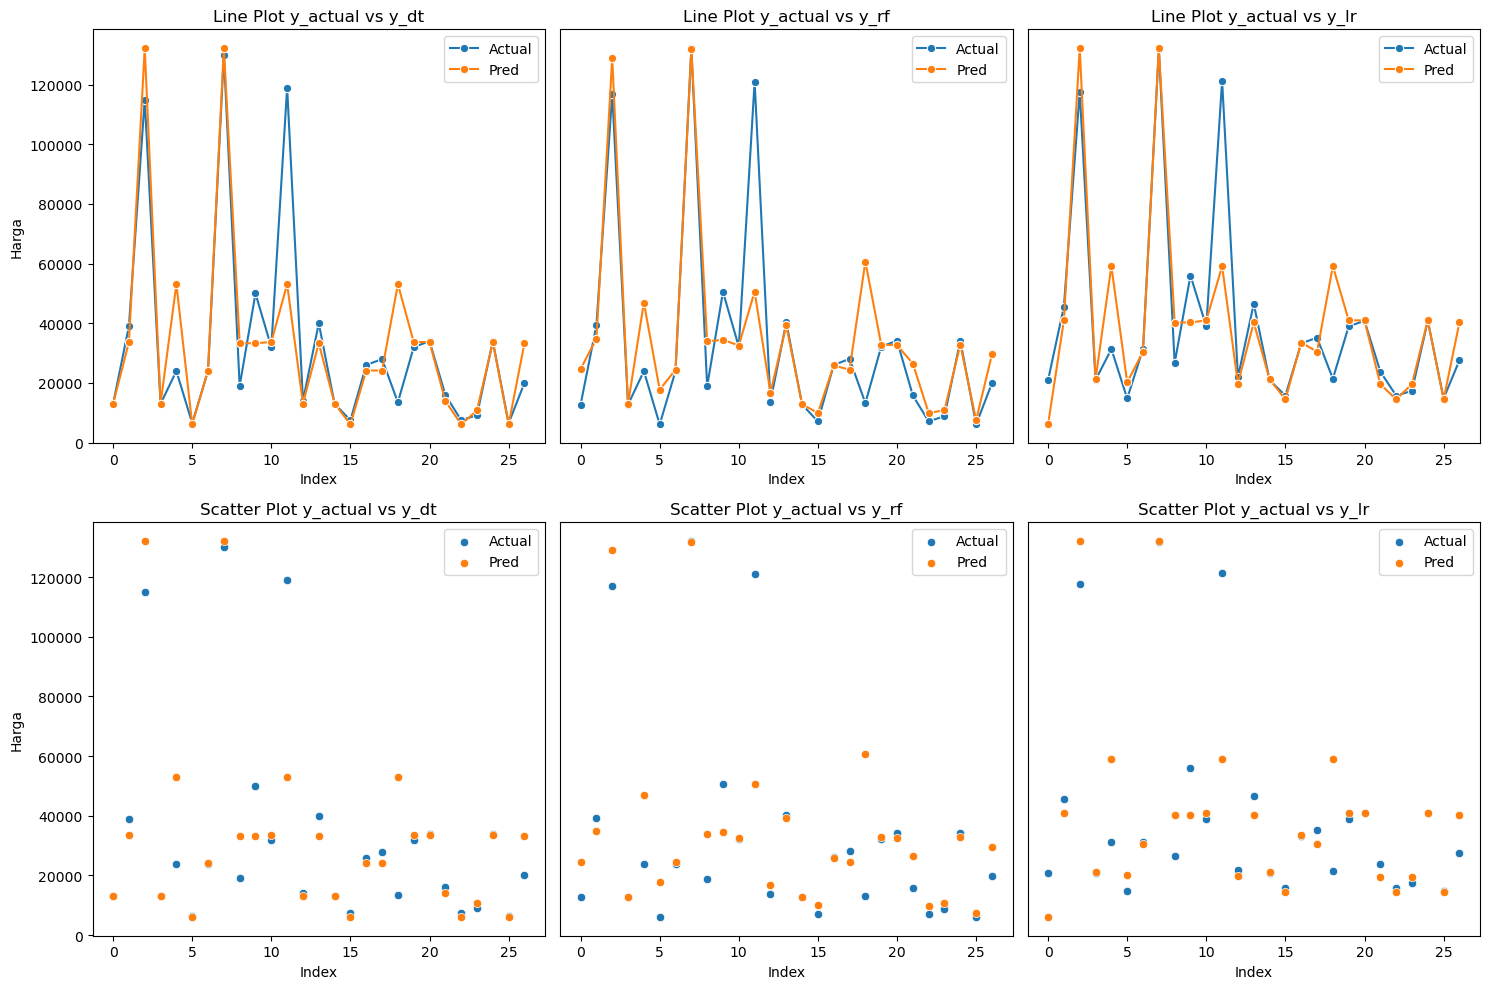

In [61]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

label = ['dt', 'rf', 'lr']
for i in range(2):
    for j in range(3):
        ax = axes[i][j]
        if i == 0:
            sns.lineplot(x=df_test_concat.index, y=df_test_concat['HARGA (RP)'], label="Actual", marker='o', ax=ax)
            sns.lineplot(x=df_test_concat.index, y=df_test_concat[f'y_{label[j]}'], label="Pred", marker='o', ax=ax)
            ax.set_title(f'Line Plot y_actual vs y_{label[j]}')
        else:
            sns.scatterplot(x=df_test_concat.index, y=df_test_concat['HARGA (RP)'], label="Actual", ax=ax)
            sns.scatterplot(x=df_test_concat.index, y=df_test_concat[f'y_{label[j]}'], label="Pred", ax=ax)
            ax.set_title(f'Scatter Plot y_actual vs y_{label[j]}')

        # Set label sumbu X untuk semua
        ax.set_xlabel("Index")
        
        # Tampilkan label Y hanya untuk kolom pertama
        if j == 0:
            ax.set_ylabel("Harga")
        else:
            ax.set_ylabel("")                # Kosongkan label Y
            ax.set_yticklabels([])          # Hilangkan tick labels Y
            ax.tick_params(axis='y', left=False)  # Hilangkan garis tick di Y-axis

plt.tight_layout()
plt.show()


In [62]:
eval_df = pd.DataFrame({
    'MAE' : [mae_dt, mae_rf, mae_lr],
    'MSE' : [mse_dt, mse_rf, mse_lr],
    'R2' : [r2_dt, r2_rf, r2_lr]
}, index=['DT', 'RF', 'LR'])

In [63]:
eval_df

,MAE,MSE,R2
DT,8461.302175,2.899358e+08,0.739133
RF,9220.851852,3.166336e+08,0.715112
LR,9312.410886,2.991141e+08,0.730875


Based on the evaluation results of the three models, it appears that the best model in this case is linear regression, with the lowest error score, although its r2 score is slightly smaller than that of the decision tree.

## Feature Importance DT

In [64]:
model_dt2 = model_dt.named_steps['model']
feature_names_dt = model_dt.named_steps['preprocessor'].get_feature_names_out()

In [65]:
ft_dt = pd.DataFrame({
            'Feature': feature_names_dt,
            'Importance': model_dt2.feature_importances_
        }).sort_values(by='Importance', ascending=False)

In [66]:
ft_dt

,Feature,Importance
12,cat__KOMODITAS_dagingsapi,0.861792
10,cat__KOMODITAS_cabairawitmerah,0.076906
14,cat__KOMODITAS_jagung,0.016277
15,cat__KOMODITAS_minyakgoreng,0.013321
3,num__EKSPOR (TON),0.012289
13,cat__KOMODITAS_gulapasir,0.010160
11,cat__KOMODITAS_dagingayamras,0.003937
9,cat__KOMODITAS_cabaimerahkeriting,0.002759
2,num__IMPOR (TON),0.001021
6,cat__KOMODITAS_bawangmerah,0.000759


## Feature Importance RF

In [67]:
model_rf2 = model_rf.named_steps['model']
feature_names_rf = model_rf.named_steps['preprocessor'].get_feature_names_out()

In [68]:
ft_rf = pd.DataFrame({
            'Feature': feature_names_rf,
            'Importance': model_rf2.feature_importances_
        }).sort_values(by='Importance', ascending=False)

In [69]:
ft_rf

,Feature,Importance
12,cat__KOMODITAS_dagingsapi,0.331762
1,num__STOK (TON),0.139241
2,num__IMPOR (TON),0.104767
4,num__RUMAH TANGGA (TON),0.104533
0,num__PRODUKSI (TON),0.089461
5,num__NON RUMAH TANGGA (TON),0.069299
3,num__EKSPOR (TON),0.036842
10,cat__KOMODITAS_cabairawitmerah,0.031271
8,cat__KOMODITAS_beras,0.022955
14,cat__KOMODITAS_jagung,0.022167


## Feature Importance LR

In [70]:
model_lr2 = model_lr.named_steps['model']
feature_names_lr = model_lr.named_steps['preprocessor'].get_feature_names_out()

In [71]:
ft_lr = pd.DataFrame({
            'Feature': feature_names_lr,
            'Coefficient': np.abs(model_lr2.coef_)
        }).sort_values(by='Coefficient', ascending=False)

In [72]:
ft_lr

,Feature,Coefficient
12,cat__KOMODITAS_dagingsapi,138840.025210
8,cat__KOMODITAS_beras,102376.075134
10,cat__KOMODITAS_cabairawitmerah,51272.235806
11,cat__KOMODITAS_dagingayamras,41999.522167
9,cat__KOMODITAS_cabaimerahkeriting,31300.395231
16,cat__KOMODITAS_telurayamras,30207.702008
6,cat__KOMODITAS_bawangmerah,28249.845421
7,cat__KOMODITAS_bawangputih,22045.555856
15,cat__KOMODITAS_minyakgoreng,14206.559105
13,cat__KOMODITAS_gulapasir,12457.944704


In [73]:
pd.DataFrame({
    "DT" : ft_dt['Feature'].head().tolist(),
    "RF" : ft_rf['Feature'].head().tolist(),
    "LR" : ft_lr['Feature'].head().tolist()
})

,DT,RF,LR
0,cat__KOMODITAS_dagingsapi,cat__KOMODITAS_dagingsapi,cat__KOMODITAS_dagingsapi
1,cat__KOMODITAS_cabairawitmerah,num__STOK (TON),cat__KOMODITAS_beras
2,cat__KOMODITAS_jagung,num__IMPOR (TON),cat__KOMODITAS_cabairawitmerah
3,cat__KOMODITAS_minyakgoreng,num__RUMAH TANGGA (TON),cat__KOMODITAS_dagingayamras
4,num__EKSPOR (TON),num__PRODUKSI (TON),cat__KOMODITAS_cabaimerahkeriting


Based on the feature importance of the three models above, it can be seen that the most influential features are commodity features. This finding is consistent with the results of the previous study, as the relationship between commodity variables and price is quite strong. Export variables appear to be less affected in the three models, but imports are quite strong in the random forest.